In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import numpy as np
import pandas as pd

In [3]:
from utils import load_and_mask_results, calculate_displacements_profile, transform_displacements

In [4]:
import matplotlib.pyplot as plt
from plotting import initialize_plot_settings, plot_displacement_profile_resolution, plot_results
initialize_plot_settings()

## ICP resolution test - 100 m depth, 1m dip slip

In [5]:
depth = 100
ds = 1
strike = 310

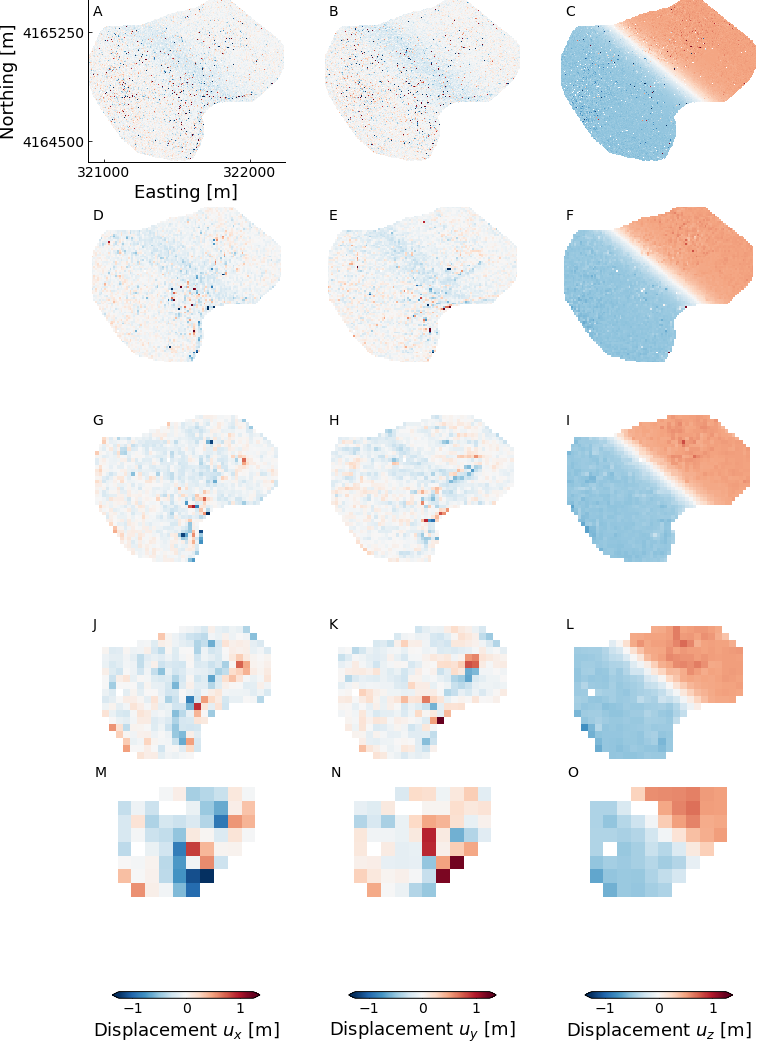

In [6]:
fig, axes = plt.subplots(5, 3, figsize=(12, 20))

dxw = 10
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss0.00_ds{ds:.2f}_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uz1_5 = uz
plot_results(x, y, ux, uy, uz, ax=axes[0, :], letters=['A', 'B', 'C'], remove_first_axes=False, vmin=-1.25, vmax=1.25)

xlim = [np.nanmin(x), np.nanmax(x)]
ylim = [np.nanmin(y), np.nanmax(y)]

dxw = 25
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss0.00_ds{ds:.2f}_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uz1_12_5 = uz
plot_results(x, y, ux, uy, uz, ax=axes[1, :], letters=['D', 'E', 'F'], vmin=-1.25, vmax=1.25)

dxw = 50
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss0.00_ds{ds:.2f}_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uz1_25 = uz
plot_results(x, y, ux, uy, uz, ax=axes[2, :], letters=['G', 'H', 'I'], vmin=-1.25, vmax=1.25)

dxw = 100
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss0.00_ds{ds:.2f}_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uz1_50 = uz
plot_results(x, y, ux, uy, uz, ax=axes[3, :], letters=['J', 'K', 'L'], vmin=-1.25, vmax=1.25)

dxw = 200
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss0.00_ds{ds:.2f}_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uz1_100 = uz
plot_results(x, y, ux, uy, uz, ax=axes[4, :], letters=['M', 'N', 'O'], plot_colorbars=True, vmin=-1.25, vmax=1.25)

plt.subplots_adjust(hspace=-0.25)

plt.savefig('/home/rmsare/fig/hsl_icp/FigureS5_LidarResolutionDS.png', dpi=300, bbox_inches='tight')

## Plots as function of depth

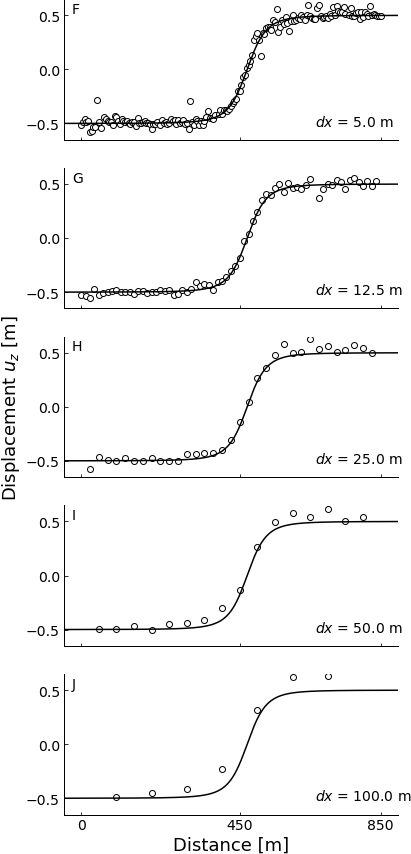

In [7]:
yobsds, ymodds, rmses = plot_displacement_profile_resolution([uz1_5, uz1_12_5, uz1_25, uz1_50, uz1_100], ['5 m', '12.5 m', '25 m', '50 m', '100 m'], ['wo', 'wo', 'wo', 'wo', 'wo'], dxs=[5, 12.5, 25, 50, 100], dip_slip=1, depth=100, plot_model=True, xlim=xlim, ylim=ylim)
#plt.savefig('/home/rmsare/fig/hsl_icp/us_ds1m_restest_lidar.png', bbox_inches='tight')

In [8]:
depths = [100 for _ in range(len(rmses))]
dip_slips = [1 for _ in range(len(rmses))]
dxs = [5, 12.5, 25, 50, 100]
df1 = pd.DataFrame(data={'depth': depths, 'ds': dip_slips, 'ss': 0, 'dx': dxs, 'rmse': rmses})

## ICP resolution test - 100 m depth, 1m strike slip

In [9]:
depth = 100
ss = 1
strike = 310

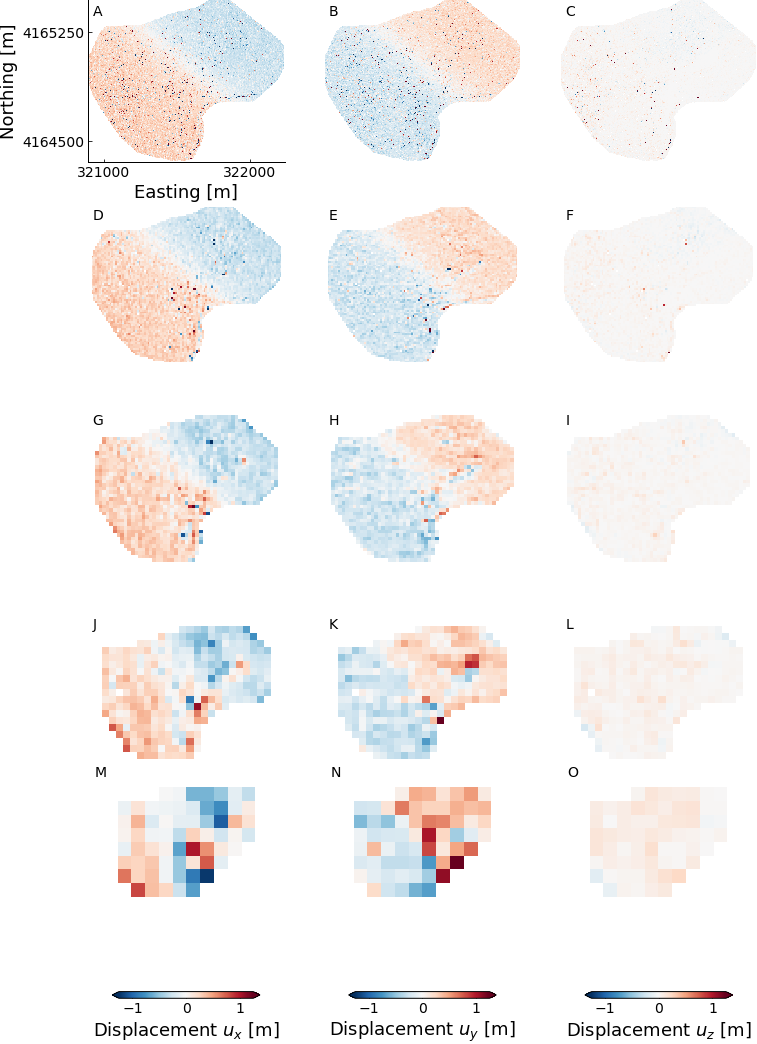

In [10]:
fig, axes = plt.subplots(5, 3, figsize=(12, 20))

dxw = 10
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss{ss:.2f}_ds0.00_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uss1_5 = transform_displacements(ux, uy, theta=strike)
plot_results(x, y, ux, uy, uz, ax=axes[0, :], letters=['A', 'B', 'C'], remove_first_axes=False, vmin=-1.25, vmax=1.25)

xlim = [np.nanmin(x), np.nanmax(x)]
ylim = [np.nanmin(y), np.nanmax(y)]

dxw = 25
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss{ss:.2f}_ds0.00_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uss1_12_5 = transform_displacements(ux, uy, theta=strike)
plot_results(x, y, ux, uy, uz, ax=axes[1, :], letters=['D', 'E', 'F'], vmin=-1.25, vmax=1.25)

dxw = 50
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss{ss:.2f}_ds0.00_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uss1_25 = transform_displacements(ux, uy, theta=strike)
plot_results(x, y, ux, uy, uz, ax=axes[2, :], letters=['G', 'H', 'I'], vmin=-1.25, vmax=1.25)

dxw = 100
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss{ss:.2f}_ds0.00_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uss1_50 = transform_displacements(ux, uy, theta=strike)
plot_results(x, y, ux, uy, uz, ax=axes[3, :], letters=['J', 'K', 'L'], vmin=-1.25, vmax=1.25)

dxw = 200
filename = f'results/HSLLidar_2017_s{strike:.2f}_d90.00_dep{depth:.2f}_ss{ss:.2f}_ds0.00_ICP_w{dxw:.2f}_str{dxw / 2:.2f}.pkl'
x, y, ux, uy, uz, residual, mask = load_and_mask_results(filename)
uss1_100 = transform_displacements(ux, uy, theta=strike)
plot_results(x, y, ux, uy, uz, ax=axes[4, :], letters=['M', 'N', 'O'], plot_colorbars=True, vmin=-1.25, vmax=1.25)

plt.subplots_adjust(hspace=-0.25)

plt.savefig('/home/rmsare/fig/hsl_icp/FigureS6_LidarResolutionSS.png', dpi=300, bbox_inches='tight')

## Plots as function of depth

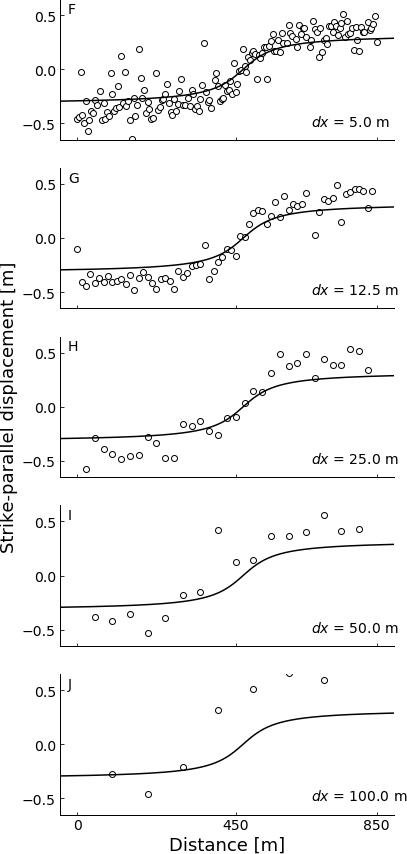

In [11]:
yobsss, ymodss, rmses = plot_displacement_profile_resolution([uss1_5, uss1_12_5, uss1_25, uss1_50, uss1_100], ['5 m', '12.5 m', '25 m', '50 m', '100 m'], ['wo', 'wo', 'wo', 'wo', 'wo'], dxs=[5, 12.5, 25, 50, 100], ylabel='Strike-parallel displacement [m]', strike_slip=1, depth=100, plot_model=True, xlim=xlim, ylim=ylim)
plt.savefig('/home/rmsare/fig/hsl_icp/us_ss1m_restest_lidar.png', bbox_inches='tight')

In [12]:
depths = [100 for _ in range(len(rmses))]
strike_slips = [1 for _ in range(len(rmses))]
dxs = [5, 12.5, 25, 50, 100]
df2 = pd.DataFrame(data={'depth': depths, 'ds': 0, 'ss': strike_slips, 'dx': dxs, 'rmse': rmses})

In [13]:
df = df1.append(df2)
#df.to_csv('tables/restest_lidar.csv')

In [14]:
rmses

[0.16975768839580238,
 0.1523360548344505,
 0.15126851619892026,
 0.21184270629457042,
 0.32776998331740775]